# Sentiment Analysis with Logistic Regression

In this project, we will try to do sentiment analysis on movie reviews. The IMDB movie reviews dataset on this [link](http://ai.stanford.edu/~amaas/data/sentiment). <br>
From those dataset, we have 25000 reviews positive and 25000 reviews negative.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('movie_data.csv')
df

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
...,...,...
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0


As we can see, the dataset contain 2 columns with review and sentiment value. The value sentiment 1 indicates that the movie has a positive review, 0 for negative review. |

In [2]:
df.loc[0, 'review']

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

Our task is simply classifying the movie reviews into either positive or negative sentiment. This is standard binary classification. However, we need to convert the text for each review into numerical representation so we can do the modeling by machine learning. <br>
We represent text by Bag of Words method which has three main process: <br>
<ul>
    <li>Tokenization: split each text into the words</li>
    <li>Vocabulary Building: collect all of vocabulary from all text</li>
    <li>Encoding: for each text, count how often each of the word in vocabulary building appear</li>
</ul> 
Before we get into detail process, we have to clean our data so each movie reviews has no  anything character/symbol except the word itself. 

In [3]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) #replace symbol with blank space
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [4]:
df.loc[0,'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [5]:
df['review'] = df['review'].apply(preprocessor)

In [6]:
df.loc[0,'review'][-50:]

'zation my vote is seven title brazil not available'

After we clean our data, we are ready to do Bag of Words process.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(df['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
print(len(vect.vocabulary_))

104083


As we can see that from the dataset, we get such a large amount of vocabulary which store in dictionary vect.vocabulary_

In [9]:
bag_of_words = vect.transform(df['review'])
bag_of_words

<50000x104083 sparse matrix of type '<class 'numpy.int64'>'
	with 6797178 stored elements in Compressed Sparse Row format>

We get sparse matrix with size 50000x104083, generally with a less nonzero values. That's a large matrix and so will impact to the computational time. We can reduce the matrix by get rid of uninformative vocabulary. There are two main approaches, the first is using a languange specific list of stop words, or the second is we can discard words that appear too frequently.

In [10]:
text_train = df['review']
y_train = df['sentiment']
print(np.bincount(y_train))

[25000 25000]


In [11]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<50000x104083 sparse matrix of type '<class 'numpy.int64'>'
	with 6797178 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names()
print(len(feature_names))
print(feature_names[1:20])

104083
['000', '00000000000', '0000000000001', '00000001', '00001', '00015', '000dm', '000s', '001', '003830', '006', '0069', '007', '0079', '007s', '0080', '0083', '009', '0093638']


As you can see that the first twenty entry in the vocabulary are all numbers. All those numbers appear somewhere in the reviews. Most of those numbers don't have any immediate semantic meaning. 
<br>
Before we try to improve our feature extraction, we will try to build classifier with y_train and the bag-of-words representation of the training data on X_train with Logistic Regression with cross validation method.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv = 5)
np.mean(scores)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8901399999999999

We obtain a mean cross validation score is 89%, quite good. We know that Logistic Regression has a parameter C. 

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print("best cross-validation-score: ", grid.best_score_)
print("best parameter: ", grid.best_params_)

best cross-validation-score:  0.8964
best parameter:  {'C': 0.1}


We get the best parameter for C is 0.1. Before we do a classification again, we want to improve our feature extraction with adding parameter min_df on CountVectorizer. That parameter indicates we use the tokens that appear in at least 5 documents. This is because a token that appears only in a single document  is unlikely to appear in the test set. 

In [16]:
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<50000x37102 sparse matrix of type '<class 'numpy.int64'>'
	with 6692067 stored elements in Compressed Sparse Row format>


We get 37099 vocabulary, fewer number than before we apply min_df parameter (101895 vocabulary). Let's do it a classification again. 

In [17]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best cross-validation-score: ", grid.best_score_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


best cross-validation-score:  0.89638


The best validation accuracy of the grid-search is still 89.6%, unchanged from before. However, we get a less feature which can make the computation time faster. The other method to improve our speed of processing is by removing uninformative words that are too frequent. Scikit-learn has a built-in function in list English_stop_words.

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(len(ENGLISH_STOP_WORDS))
print(list(ENGLISH_STOP_WORDS)[::10])

318
['eight', 'they', 'since', 'anyhow', 'several', 'where', 'made', 'even', 'further', 'someone', 'thereby', 'forty', 'perhaps', 'de', 'became', 'such', 'already', 'our', 'the', 'herein', 'have', 'whenever', 'much', 'around', 'enough', 'few', 'five', 'nine', 'an', 'besides', 'etc', 'without']


Removing the stop-words in the list can only decrease the number of features by the length of the list.

In [19]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<50000x36795 sparse matrix of type '<class 'numpy.int64'>'
	with 4300607 stored elements in Compressed Sparse Row format>


We can see that the feature reduce from 37102 to 36795. Let's do a classification again.

In [20]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: ", grid.best_score_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best cross-validation score:  0.89146


It does not seem worth using this method because the cross-validation score is slightly decrease. Instead of dropping features that are deemed unimportant, another approach is we can use TF-IDF method which refer to term frequency-inverse document frequency.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

In [22]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: ", grid.best_score_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:

Best cross-validation score:  0.89992


There is some improvement if we use TF-IDF method instead of remove features using stop-words. We can also inspect which words TF-IDF found most important. Keep in mind that the TF-IDF scaling is meant to find words that distinguish documents, but it is a purely unsupervised technique. 

In [23]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over dataset:
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]])
print("features with highest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['undoubtedly' 'avoided' 'awhile' 'satisfy' 'suffice' 'assumed' 'lasting'
 'shoulders' 'overlong' 'sums' 'demanding' 'reluctant' 'rapidly'
 'wrenching' 'earn' 'vastly' 'vain' 'sticking' 'lush' 'burst']
features with highest tfidf
['basket' 'jesse' 'the' 'hackenstein' 'victor' 'victoria' 'bridget'
 'dominick' 'rob' 'khouri' 'zizek' 'scarlett' 'timon' 'titanic' 'sheba'
 '2x' 'hawk' 'custer' 'prot' 'marty']


Many of the high tf-idf features actually identify certain shows or movies. These terms only appear in reviews for this particular show. This is very clear for example for “dominick”, "zizek” and “titanic”, but “scarlett” here actually also refers to a movie title.

In [24]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("features with lowest idf")
print(feature_names[sorted_by_idf[:100]])

features with lowest idf
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'if' 'they' 'there' 'out' 'his'
 'just' 'about' 'or' 'he' 'has' 'what' 'some' 'can' 'good' 'when' 'more'
 'time' 'up' 'very' 'even' 'only' 'see' 'no' 'would' 'my' 'really' 'well'
 'which' 'story' 'had' 'me' 'much' 'than' 'their' 'were' 'other' 'get'
 'do' 'been' 'don' 'most' 'also' 'into' 'first' 'how' 'great' 'her' 'will'
 'made' 'because' 'people' 'make' 'way' 'bad' 'could' 'we' 'any' 'after'
 'them' 'too' 'then' 'watch' 'think' 'movies' 'acting' 'she' 'seen'
 'characters' 'its']


The words that have low inverse document frequency, that is those that appear frequently and are therefore deemed less important.

In [25]:
!pip install mglearn

In [26]:
import mglearn
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'tfidf-coefficient')

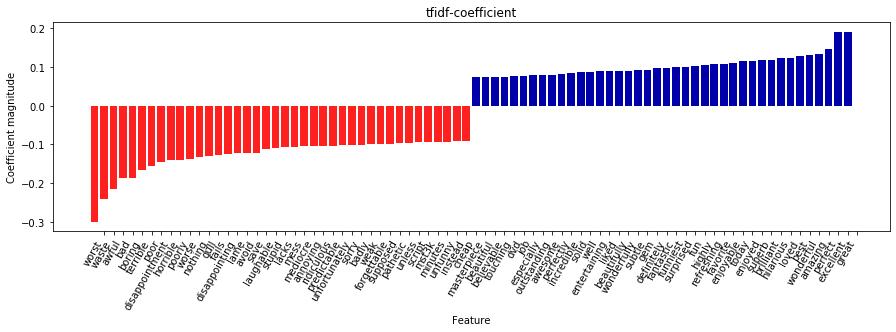

In [27]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature_names, n_top_features=40)
plt.title("tfidf-coefficient")

The bar-chart above shows the 25 largest and 25 smallest coefficients of the logistic regression model, with the bar showing the size of each coefficient. The negative coefficients on the left belong to words that according to the model are indicative of negative reviews, while the positive coefficients on the right belong to word that according to the model indicate positive reviews.

The tools discussed here should serve as a great starting point when trying to process text data. In particular for text classification such as spam and fraud detection or sentiment analysis, bag of word representations provide a simple and powerful solution.